# Introduction

This documentation discusses about the Linear Support Vector Machine Classification Algorithm.

We are going to utilize the `scikit-learn` library, however, we will discuss the mathematical concepts and properties as well.

## Concept of linear SVM Classification

**Support Vector Machine** is a very popular **supervised** algorithm.
It is utilized both for regression and classification tasks, but this documentation will focus on the classification.

The objective of any SVM is to find a **"hyperplane"**. This is a linear "plane" having 1 less dimension than the datapoints, sthat theoretically separates the data points into the desired amount to classification ($\ge 2$). Whilst doing this, it aims to maximize the "margin", which is basically a space between the closest data points from each class to the hyperplane.

## Explanation

First of all, for any dimensional data points, it is possible to calculate the eucledian distance from the origin. To do this, we use the following equation:
$$||x|| = \sqrt{\sum_{i=1} ^d x_i^2 }$$

where $d$ is the dimension of the datapoint, and $x_i$ being the coordinate in the $i$-th dimension. 

Similarly, we can advance this to find the euclidean distance from point $x$ to $y$.

$$d||x-y|| = \sqrt{\sum_{i=1} ^d (x-y)_i^2 }$$


TO recall, the goal of SVM is to :
- separate the datapoints as accurately as possible
- while keeping the biggest margin

The margin is calculated using the closest datapoint from each class group and any given point of the hyperplane.

Thus the optimal hyperplane is given finding simultaneously that maximizes the total margin.

**IMPORTANT** There are certain cases in which the datasets are not linearly separable, in this case, we use the concept of **kernel**, however, since the kernel is given to be linear, we will not discuss about this. 

The C parameter is a universal concept in most classification algorithms, called the soft margin. It is a judgment factor in how much tradeoff they allow, for an error case. (i.e. misclassifying **blue** as **red**) This may seem a problem at first glance, but allowing for this may vastly improve the margin of the hyperplane positioning. 

## Pros and Cons of Linear SVM Classification

### Pros

- There are relatively small numbers of hyperparameters (variables dicided by human) to tune
- It is relatively good even in higher dimension.

### Cons

- When there are noises in the data, it may not be easy to accurately learn the patterns.

# Implementation

THe given data contains 1100 elements (samples) in total, with each containing 25 features without any skips on the data (no NaN). The labes are 0,1,2, and 3, thus in total 4.
The task is to achieve the highest accuracy score. We will be using the **f1-weighted** score.

## Pre-processing

#### Importing basic modules and frameworks

In [0]:
import numpy as np
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt


%matplotlib inline

#### Importing data + visualization

In [0]:
data = pd.read_csv("data.csv") # pandas reading the csv

data.head() #showing the first five rows

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
0,0,1,0.459513,-0.022404,2.567985,0.015171,-0.375633,2.353966,1.303802,-0.532547,4.963351,0.909550,0.070212,1.115109,1.120162,1.278469,-0.841888,1.852674,2.927161,-0.146587,2.643758,-0.474561,0.132274,1.330377,-0.122502,-0.230676,-4.738911
1,1,2,-0.378271,0.030319,-0.296172,1.284703,0.201053,1.730669,0.407865,-0.999654,0.189238,-2.310768,0.097967,2.293972,0.135496,1.503611,0.355616,2.519479,-0.144690,-1.466299,-5.254762,-0.468255,-0.658853,2.608092,-0.409789,0.256659,2.561582
2,2,2,-1.051696,-0.590928,-1.516205,0.806571,0.709398,-1.473467,0.382157,-0.183121,1.300136,1.528845,0.104075,1.479346,0.644821,0.228096,-0.726865,1.141307,3.009853,0.604444,-1.895364,0.265408,0.750191,1.786794,0.794111,0.382050,-0.843549
3,3,1,1.347502,-0.386373,0.313343,0.379712,-0.948648,1.636031,-0.808498,0.831235,0.282650,-3.973514,0.391391,0.824747,-0.036106,0.104591,0.450434,0.877102,-0.071059,-1.498742,0.125098,-0.114234,0.424445,-2.328150,-0.302412,0.262368,0.068371
4,4,2,1.094431,0.456027,-1.381166,0.564079,-0.224672,-0.668856,-0.062015,-1.031345,1.238478,-1.918015,-0.709299,1.178675,-0.622415,-0.427480,0.300991,4.662197,-1.505002,-0.773118,-0.920323,-0.202668,0.563538,-1.174693,1.115119,0.228327,0.048306


#### Slicing the data into the feature matrix and the label vector

as a preprocessing, we are required to prepare the feature matrix and the label vector, as a "variable set" and the "answer set".

In [0]:
#X = data.iloc[:,2:] # sliced off the first two coloumns of the dataset.
#y = data.iloc[:,[1]] # picked the second column vector

This method created some unwanted behaviour, thus waived for this project.
Thus, we are resorting to a slightly more naive way of slicing.

In [0]:
X = data.drop(["label", "Unnamed: 0"], axis=1)

In [0]:
y = data["label"]

#### Splitting them into Training set and Test set

From the previously splitted data, we would like to give some portion as a material for the machine to learn the pattern (training data), and some portion as a verification (test set) to check if the machine was able to accurtely learn the patterns seen from the training data.

In [0]:
from sklearn.model_selection import train_test_split #most commonly used splitter module

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1) #We have selected one of the most common sized for the test set. 

For a future insight purpose, we are going to check whether the data is balanced or not.

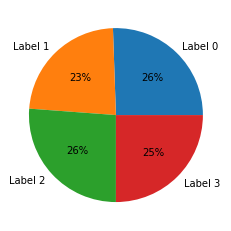

In [0]:
label_frequencies = [sum(data["label"] == i) for i in range(4)]
labels = [f"Label {i}" for i in range(4)]
plt.pie(label_frequencies, labels = labels, autopct='%1.0f%%')

plt.show()

It is more or less a balanced data.

## Linear SVM Classifier 

### Learning

#### Baseline

In [0]:
from sklearn.svm import LinearSVC #linear svm classifier module
from sklearn.metrics import f1_score # f1 score calculation module

clf0 = LinearSVC(max_iter = 10000) #defining a machine into clf0 (No hyperparameter settings, except max_iter, as it did not finish converging within the default # of iterations)
clf0.fit(X_train, y_train) # telling the machine to learn the pattern based on the training set of X and y. (raveled because it had to be a row vector)
y_pred_0 = clf0.predict(X_test) # telling the machine to spit out guesses toward the test set (questions)

f1_score(y_pred, y_test, average="weighted") # checking the similarity score of the y_pred (guess) and y_test (correct answer) using the f1 method. average cannot be defaulted as it is for binary, in which case this isn't.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5891397354571469

Without tweaking any hyperparameters, we obtained a f1 score of 53.0%.

Showing the confusion matrix to get more details out of it:

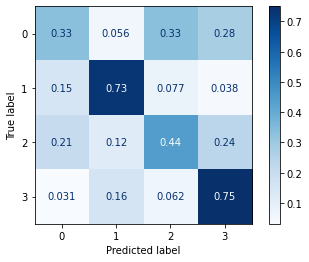

In [0]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import plot_confusion_matrix as pcm

pcm(clf0, X_test, y_test, cmap=plt.cm.Blues, normalize="true")

#### Exploring methods of improvement

We are allowed to optimize our algorithm by changing some parameters that the machine uses, and the ones that are in the scope are:

- Kernels (Not possible, as restricted to linear.)
- C (The margins)
- Penalty Function
- Loss function
- dual boolean


Also, we may want to consider some other methods, such as:

- Scaling
- Usage of Cross Validation function
- simply tweaking weights (very much sub-optimal)

##### Grid Searching

Because of limited amount of time and requirement, we are going to resort to grid search, instead of evolutionary alrogithm or a random search.

We are going to simultaneously try different loss functions, penalty functions, and dual bools as well.

Also, we will do the grid search to the scaled data.

After a grid search of 1600 tests in total: 2 for penalty,  2 for loss, 2 for dual, 2 for fit intercept, and 100 c values for eachof them.

In [0]:
from sklearn import preprocessing

X1 = preprocessing.scale(X)

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y, test_size=0.1)

In [0]:
from sklearn.model_selection import GridSearchCV
grid_params = {"penalty":["l1","l2"],"C": np.linspace(0.001,3,100), "loss": ["hinge", "squared_hinge"], "dual":[True, False], "fit_intercept":[True, False]}
lsvc = LinearSVC(max_iter=10000, class_weight="balanced")
gs = GridSearchCV(lsvc, grid_params, verbose = 1, n_jobs = -1, scoring = "f1_weighted")
gs.fit(X1_train, y1_train)
print(gs.best_params_, f"best score was: {gs.best_score_}")

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 2136 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3536 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4520 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 5612 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 6794 tasks      | elapsed:  9.6min


{'C': 0.031292929292929296, 'dual': False, 'fit_intercept': False, 'loss': 'squared_hinge', 'penalty': 'l1'} best score was: 0.5715142307797334


[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed: 12.7min finished


In [0]:
clf1 = LinearSVC(C=0.031292929292929296, penalty='l1', loss='squared_hinge',dual=False, tol=1e-3, max_iter = 10000000, fit_intercept=False, class_weight="balanced")

clf1.fit(X1_train,y1_train)

y_pred_1 = clf1.predict(X1_test)

f1_score(y_pred_1, y1_test, average="weighted") 

0.558681214809867

plotting the confusion matrix:

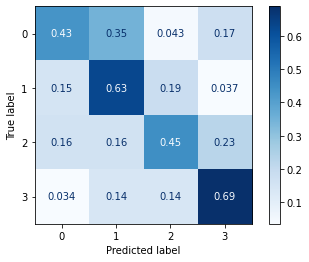

In [0]:
pcm(clf1, X1_test, y1_test, cmap=plt.cm.Blues, normalize="true")

Although we have performed an optimization, we failed to improve the score by a recognizable margin (around 5%)

##### Cross Validation

In [0]:
from sklearn.model_selection import cross_val_predict

svc = LinearSVC(max_iter=100000)

y_pred_cv0 = cross_val_predict(svc,X,y,cv=5)

f1_score(y_pred_cv0, y, average="weighted")

0.5796115304141221

Even with cross validation, we failed to improve the score.

##### Manual weights editing

0.6203622138510577


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


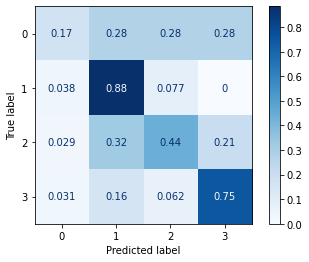

In [0]:
clf2 = LinearSVC(C=2.359285714285714, dual=True, fit_intercept=True, loss="hinge", max_iter=1000000, class_weight={0:65,1:15,2:25,3:10})

clf2.fit(X_train, y_train)
y_pred_2 = clf2.predict(X_test)

print(f1_score(y_pred2, y_test, average="weighted"))

pcm(clf2, X_test, y_test, cmap=plt.cm.Blues, normalize="true")

As we can see, although there are plenty of spaces for exploration of weight distributions, some manual tweakings yielded to a higher overall accuracy scores. Since labels 1 and 3 are having higher accuracy rates, it is often considered to be a bad solution. That being said, if we could, for example, perform this for label classification -> Assuming items labeled as 1 or 3 will get pulled out from data -> perform a 2-class classification between 0 and 2, as this is much more simple and easy to perform.